In [45]:
import numpy as np
import pandas as pd
from pathlib import Path
%matplotlib inline
import matplotlib.pyplot as plt
import hvplot.pandas

import warnings
warnings.simplefilter(action='ignore', category=Warning)

In [46]:
# Return Forecasting: Time Series Analysis & Modelling with CAD-PHY Exchange rate data

In [47]:
# Currency pair exchange rates for CAD/JPY
cad_jpy_df = pd.read_csv(
    Path("C:/Users/panka/Documents/Homework/Module_10_Challenge/cad_jpy.csv"), index_col="Date", infer_datetime_format=True, parse_dates=True
)
cad_jpy_df.head()

,Price,Open,High,Low
Date,,,,
1982-01-05,184.65,184.65,184.65,184.65
1982-01-06,185.06,185.06,185.06,185.06
1982-01-07,186.88,186.88,186.88,186.88
1982-01-08,186.58,186.58,186.58,186.58
1982-01-11,187.64,187.64,187.64,187.64


In [48]:
# Trim the dataset to begin on January 1st, 1990
cad_jpy_df = cad_jpy_df.loc["1990-01-01":, :]
cad_jpy_df.head()

,Price,Open,High,Low
Date,,,,
1990-01-02,126.37,126.31,126.37,126.31
1990-01-03,125.30,125.24,125.30,125.24
1990-01-04,123.46,123.41,123.46,123.41
1990-01-05,124.54,124.48,124.54,124.48
1990-01-08,124.27,124.21,124.27,124.21


<AxesSubplot:xlabel='Date'>

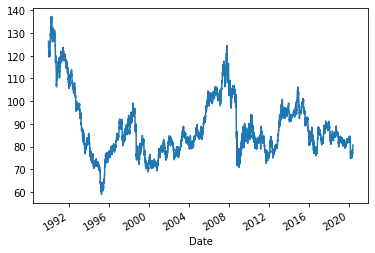

In [49]:
# Initial Time-Series Plotting

# Plot the "Price" column from the dataframe:
cad_jpy_df['Price'].plot()

In [50]:
# Question: Do you see any patterns, long-term and/or short? 
# Ans: long term : As we can see above plot above the Canadain dollar dropped between the period of 1992 and 2020. 1 CAD was around 120 Yen in 1992 and it decreased to 80 Yen by 2020.
# However in short term the CAD has been stable after a volatile drop in 2008; the price being hovering between 70 to 100 Yen/CAD

In [51]:
# Decomposition Using a Hodrick-Prescott Filter into trend and noise

import statsmodels.api as sm

# Apply the Hodrick-Prescott Filter by decomposing the exchange rate price into two separate series:
cad_jpy_df_noise, cad_jpy_df_trend = sm.tsa.filters.hpfilter(cad_jpy_df["Price"])

<AxesSubplot:xlabel='Date'>

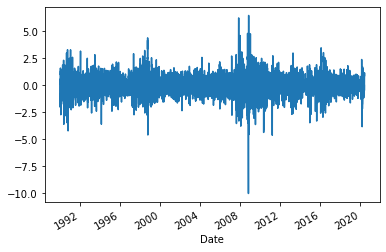

In [52]:
# noise plot
cad_jpy_df_noise.plot()

<AxesSubplot:xlabel='Date'>

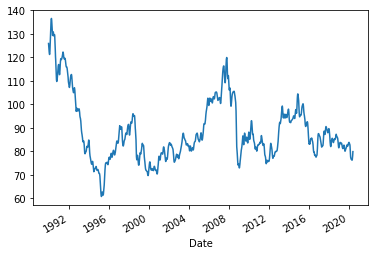

In [53]:
# trend plot
cad_jpy_df_trend.plot()

In [54]:
# Create a dataframe of just the exchange rate price, and add columns for "noise" and "trend" series from above:
cad_jpy_df_new = pd.concat([cad_jpy_df['Price'], cad_jpy_df_noise, cad_jpy_df_trend], join="inner", axis=1)
cad_jpy_df_new.head()

,Price,Price_cycle,Price_trend
Date,,,
1990-01-02,126.37,0.519095,125.850905
1990-01-03,125.30,-0.379684,125.679684
1990-01-04,123.46,-2.048788,125.508788
1990-01-05,124.54,-0.798304,125.338304
1990-01-08,124.27,-0.897037,125.167037


In [55]:
# Trim the dataset to begin on January 1st, 2015 
cad_jpy_df_hp = cad_jpy_df_new.loc["2015-01-01":, :]
cad_jpy_df_hp.head()

,Price,Price_cycle,Price_trend
Date,,,
2015-01-01,103.12,1.523927,101.596073
2015-01-02,102.25,0.945717,101.304283
2015-01-05,101.70,0.708200,100.991800
2015-01-06,100.04,-0.620865,100.660865
2015-01-07,100.93,0.615839,100.314161


In [56]:
# Plot the Exchange Rate Price vs. the Trend for 2015 to the present
cad_jpy_df_new_plot = cad_jpy_df_hp.hvplot.line(x="Date",y=["Price","Price_trend"],label="Price vs Trend")
cad_jpy_df_new_plot

:NdOverlay   [Variable]
   :Curve   [Date]   (value)

In [57]:
# Question: Do you see any patterns, long-term and/or short?
# Ans: Long term : We can see a decline of the CAD/JPY exchange rate from 1 CAD = 101.5 Yen in 2015 to 1 CAD = 78.29 Yen by 2020
# Short term: We can see a downtrend between 2015 to 2017 where the CAD/JPY exchange rate decreased from 101.5 to 75.8 Yen
# There are short term fluctuations around the trend amd price deviates around the trend line.

Text(0.5, 1.0, 'Noise')

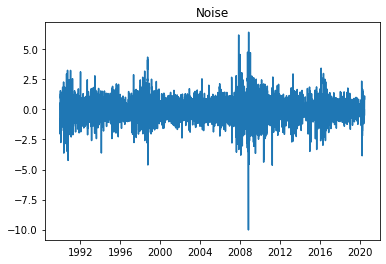

In [58]:
# Plot the Settle Noise
plt.plot(cad_jpy_df_noise)
plt.title("Noise")

In [69]:
# Forecasting Returns using an ARMA Model

# ARMA model has become obselete in Python. Code gives an error so skipping this part as per our Instrcutor advise. Below is the code in green

# # Create a series using "Price" percentage returns, drop any nan"s, and check the results:
# (Make sure to multiply the pct_change() results by 100)
# In this case, you may have to replace inf, -inf values with np.nan"s
returns = (cad_jpy_df[["Price"]].pct_change() * 100)
returns = returns.replace(-np.inf, np.nan).dropna()
returns.tail()

# Plot returns
# plt.plot(returns["Price"])
# plt.title("Price Returns")
# import statsmodels.api as sm
# from statsmodels.tsa.arima_model import ARMA

# Estimate and ARMA model using statsmodels (use order=(2, 1))
# model = ARMA(returns.values, order=(2, 1))
# Fit the model and assign it to a variable called results
# results = model.fit()

# Output model summary results:
# results.summary()

,Price
Date,
2020-05-29,0.076697
2020-06-01,1.251756
2020-06-02,1.425508
2020-06-03,0.373134
2020-06-04,0.012392


In [63]:
# Forecasting Returns using an ARMIA Model

import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA

# Estimate and ARIMA model using statsmodels (use order=(p,d,q))
ARIMA_model = ARIMA(cad_jpy_df["Price"], order=(5,1,1)) 

# Fit the model and assign it to a variable called results
results = ARIMA_model.fit()



In [64]:
# Output model summary results:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Price   No. Observations:                 7929
Model:                 ARIMA(5, 1, 1)   Log Likelihood               -8745.898
Date:                Sat, 06 Aug 2022   AIC                          17505.796
Time:                        00:08:22   BIC                          17554.643
Sample:                             0   HQIC                         17522.523
                               - 7929                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4303      0.331      1.299      0.194      -0.219       1.080
ar.L2          0.0178      0.012      1.459      0.145      -0.006       0.042
ar.L3         -0.0118      0.009     -1.313      0.189      -0.029       0.006
ar.L4          0.0110      0.008      1.299      0.194      -0.006       0.028
ar.L5         -0.0191      0.007     -2.706      0.007      -0.033      -0.005
ma.L1         -0.4583      0.332     -1.381      0.167      -1.109       0.192
sigma2         0.5318      0.004    118.418      0.000       0.523       0.541
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              9233.72
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):               0.78   Skew:                            -0.58
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.16
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<AxesSubplot:title={'center':'5 day Returns Forecast'}>

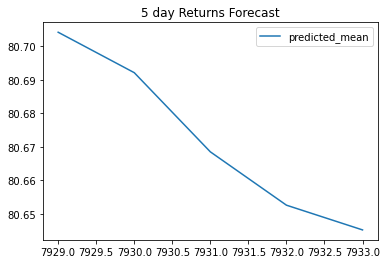

In [65]:
# Plot the 5 Day Price Forecast
pd.DataFrame(results.forecast(steps=5)).plot(title="5 day Returns Forecast")

In [66]:
# Question: What does the model forecast will happen to the Japanese Yen in the near term?
# Ans: The model forecasts that the Japanese Yen will gain strength in next 5 days. CAD would be devalued as the price of CAD relative to Yen will decrease

In [78]:
# Volatility Forecasting with GARCH

from arch import arch_model

In [79]:
# Estimate a GARCH model:
garch_model = arch_model(returns, mean="Zero", vol="GARCH", p=2, q=1)


# Fit the model
results = garch_model.fit(disp="off")

In [80]:
# Summarize the model results
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                       Zero Mean - GARCH Model Results                        
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.000
Mean Model:                 Zero Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -8911.02
Distribution:                  Normal   AIC:                           17830.0
Method:            Maximum Likelihood   BIC:                           17858.0
                                        No. Observations:                 7928
Date:                Sat, Aug 06 2022   Df Residuals:                     7928
Time:                        00:22:22   Df Model:                            0
                               Volatility Model                              
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
omega      9.0733e-03  2.545e-03      3.566  3.628e-04  [4.086e-03,1.406e-02]
alpha[1]       0.0624  1.835e-02      3.402  6.682e-04  [2.647e-02,9.841e-02]
alpha[2]       0.0000  2.010e-02      0.000      1.000 [-3.940e-02,3.940e-02]
beta[1]        0.9243  1.229e-02     75.205      0.000      [  0.900,  0.948]
=============================================================================

Covariance estimator: robust
"""

In [81]:
# Find the last day of the dataset
last_day = returns.index.max().strftime('%Y-%m-%d')
last_day

'2020-06-04'

In [82]:
# Create a 5 day forecast of volatility
forecast_horizon = 5

# Start the forecast using the last_day calculated above
forecasts = results.forecast(start=last_day, horizon=forecast_horizon)

In [83]:
# Annualize the forecast
intermediate = np.sqrt(forecasts.variance.dropna() * 252)
intermediate.head()

,h.1,h.2,h.3,h.4,h.5
Date,,,,,
2020-06-04,12.566029,12.573718,12.581301,12.588778,12.596153


In [84]:
# Transpose the forecast so that it is easier to plot
final = intermediate.dropna().T
final.head()

Date,2020-06-04
h.1,12.566029
h.2,12.573718
h.3,12.581301
h.4,12.588778
h.5,12.596153


Text(0.5, 1.0, 'GARCH Volatility Forecast')

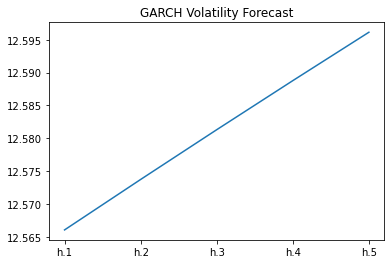

In [85]:
# Plot the final forecast
plt.plot(final)
plt.title("GARCH Volatility Forecast")

In [86]:
## Question:** What does the model forecast will happen to volatility in the near term?

## Ans: The model forecasts that the volatility will increase in the near term.

In [88]:
# Conclusions
 
# Que. Based on your time series analysis, would you buy the yen now?

# Ans. Based on time series analysis, the YEN will be stronger compared to CAD, so its a buying opportunity.

# Que. Is the risk of the yen expected to increase or decrease?

# Ans. The the risk will increase in the near future as GARCH model shows high volatility.

# Que. Based on the model evaluation, would you feel confident in using these models for trading?
# Ans. The model can be used with conjunction with other models to come up with a trading decision as p value is insignificant from the model.
# I will be not confindent until i see results from evaluating other models.